# importing packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from warnings import filterwarnings
filterwarnings('ignore')

# Data preprocessing

In [2]:
df = pd.read_csv("Adv.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape

(200, 4)

In [6]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


# Exploratory data analysis¶

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


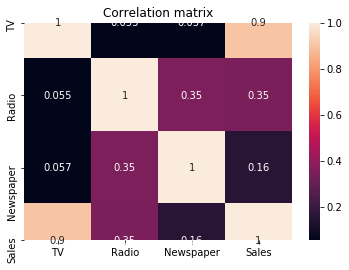

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

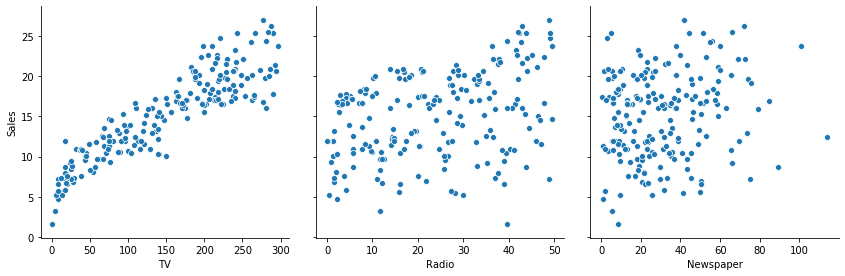

In [13]:
sns.pairplot(df,x_vars = ['TV','Radio','Newspaper'],y_vars='Sales',size = 4)

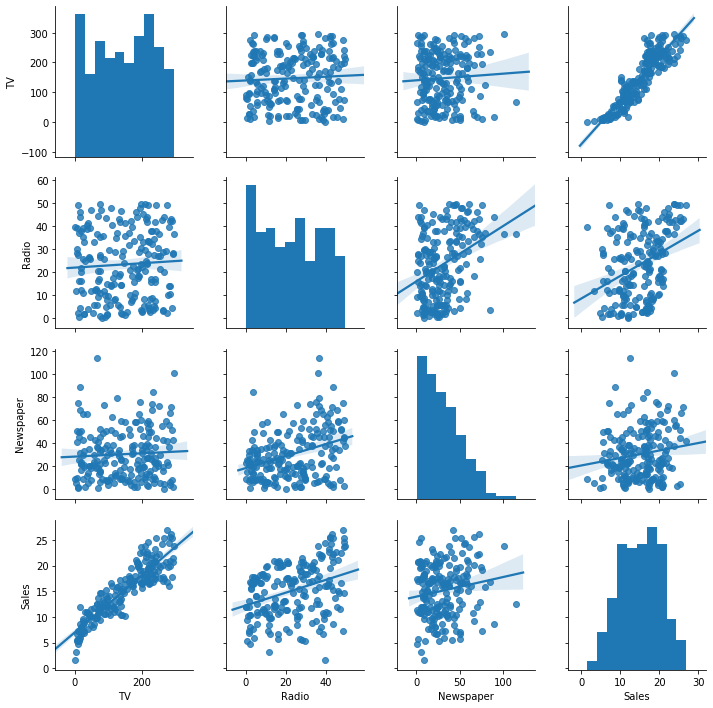

In [14]:
sns.pairplot(df, kind ='reg')

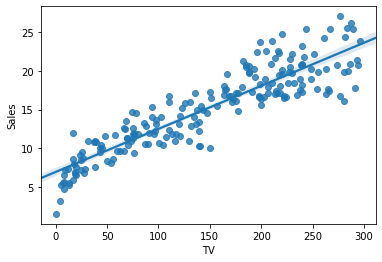

In [16]:
sns.regplot(df['TV'], df['Sales'])

# splitting the data into training and test data

In [17]:
#Initializing the variables
X = df['TV'].values.reshape(-1,1)
y = df['Sales'].values.reshape(-1,1)

In [18]:
print(X)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [19]:
print(y)

[[22.1]
 [10.4]
 [12. ]
 [16.5]
 [17.9]
 [ 7.2]
 [11.8]
 [13.2]
 [ 4.8]
 [15.6]
 [12.6]
 [17.4]
 [ 9.2]
 [13.7]
 [19. ]
 [22.4]
 [12.5]
 [24.4]
 [11.3]
 [14.6]
 [18. ]
 [17.5]
 [ 5.6]
 [20.5]
 [ 9.7]
 [17. ]
 [15. ]
 [20.9]
 [18.9]
 [10.5]
 [21.4]
 [11.9]
 [13.2]
 [17.4]
 [11.9]
 [17.8]
 [25.4]
 [14.7]
 [10.1]
 [21.5]
 [16.6]
 [17.1]
 [20.7]
 [17.9]
 [ 8.5]
 [16.1]
 [10.6]
 [23.2]
 [19.8]
 [ 9.7]
 [16.4]
 [10.7]
 [22.6]
 [21.2]
 [20.2]
 [23.7]
 [ 5.5]
 [13.2]
 [23.8]
 [18.4]
 [ 8.1]
 [24.2]
 [20.7]
 [14. ]
 [16. ]
 [11.3]
 [11. ]
 [13.4]
 [18.9]
 [22.3]
 [18.3]
 [12.4]
 [ 8.8]
 [11. ]
 [17. ]
 [ 8.7]
 [ 6.9]
 [14.2]
 [ 5.3]
 [11. ]
 [11.8]
 [17.3]
 [11.3]
 [13.6]
 [21.7]
 [20.2]
 [12. ]
 [16. ]
 [12.9]
 [16.7]
 [14. ]
 [ 7.3]
 [19.4]
 [22.2]
 [11.5]
 [16.9]
 [16.7]
 [20.5]
 [25.4]
 [17.2]
 [16.7]
 [23.8]
 [19.8]
 [19.7]
 [20.7]
 [15. ]
 [ 7.2]
 [12. ]
 [ 5.3]
 [19.8]
 [18.4]
 [21.8]
 [17.1]
 [20.9]
 [14.6]
 [12.6]
 [12.2]
 [ 9.4]
 [15.9]
 [ 6.6]
 [15.5]
 [ 7. ]
 [16.6]
 [15.2]
 [19.7]


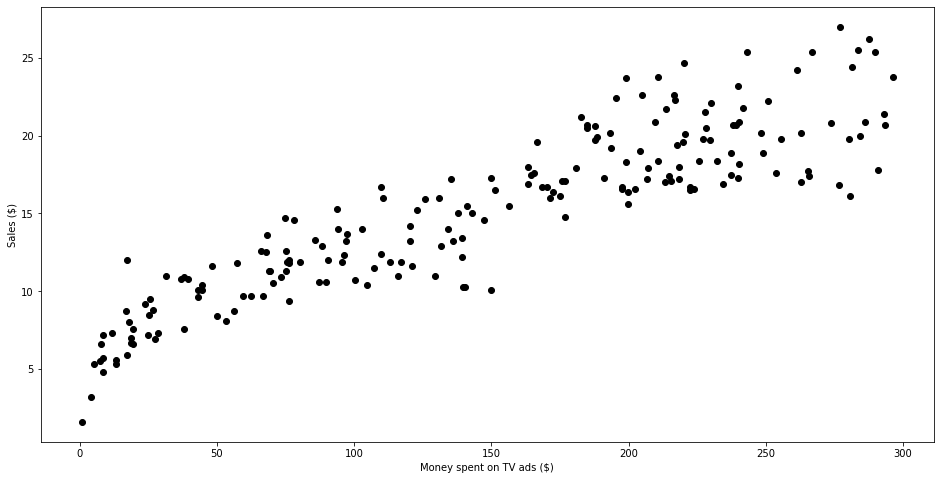

In [20]:
#Ploting a graph to see the points
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Model training

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
X_pred_train = reg.predict(X_train)

In [25]:
err_score = r2_score(y_train,X_pred_train)

In [26]:
print("R squared error" , err_score)

R squared error 0.8134064937688356


In [27]:
mean_err_score = mean_squared_error(y_train,X_pred_train)

In [28]:
print("mean squared error" , mean_err_score)

mean squared error 5.4616852241393


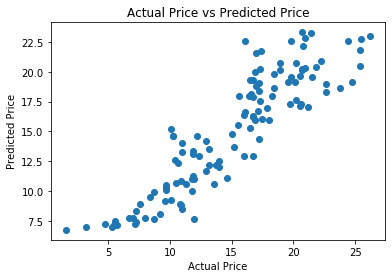

In [29]:
plt.scatter(y_train,X_pred_train)
plt.xlabel('Actual Price')
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

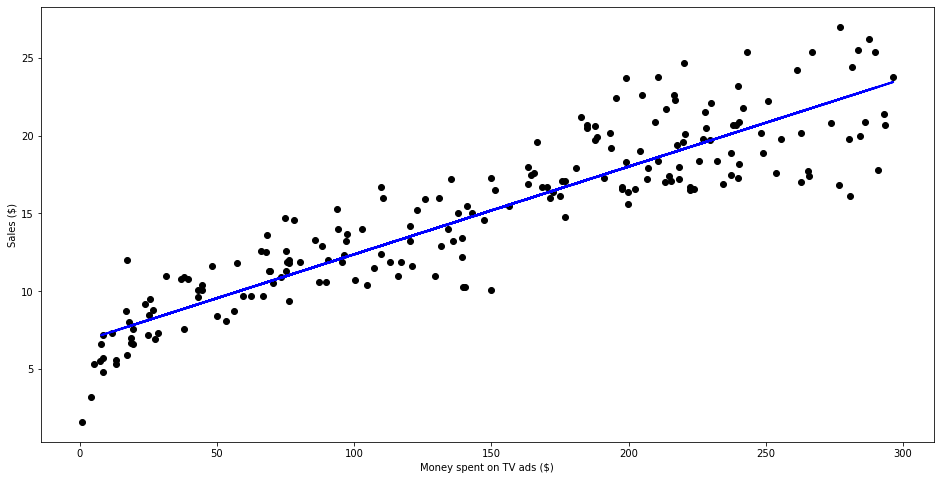

In [30]:
# predicting the test set results
y_pred = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(X_test,y_pred,c='blue',linewidth=2)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [31]:
#Calculating the Coefficients
reg.coef_

array([[0.05639685]])

In [32]:
#Calculating the Intercept
reg.intercept_

array([6.73259742])

In [33]:
output = reg.predict([[230.1]])
print('the sales of the TV is : ',output)

the sales of the TV is :  [[19.70951315]]
